# Poisson Distribution

In [1]:
import latex

Poisson: $y$ = the number of events occurring during a fixed time interval or length $t$ or a fixed region $R$ or area or volume $m(R)$. 

## Conditions of Poisson:
- Events occur one at a time: Two or more events do not occur precisely at the same time or in the same space
- The occurrence of an event in a given period of time or region of space is independent of the occurrence of the event in a nonoverlapping time period or region of space. The (non)occurrence doesn’t affect the probability of an other event. 
- The expected number of events during one period or in one region, µ, is the same as the expected number of events in any other period or region. 

## Formula Poisson
$P(y)=  \frac{μ^y e^{-μ}} {y!}$ 

where $e$ is a naturally occurring constant approximately equal to 2.71828.


## Calculating Poisson Values with Python

In [2]:
from scipy.stats import poisson

In [3]:
#Poisson probabilities can be calculated with Python:
#Poisson(y, µ)
#In R, you use dpois(1,.9)
poisson.pmf(1, 0.9)

0.36591269376653923

To make a table with the calculations:

In [4]:
import numpy as np

# Enter the value of µ here:
mu = 0.5
print(mu)

# Enter the values of y
y = np.array(range(1,10))
print(y)

0.5
[1 2 3 4 5 6 7 8 9]


In [5]:
import pandas as pd

# The function poisson.pmf(y, mu) returns the probabilities for all y values of the Poisson distribution:
dp = poisson.pmf(y, mu)
dp

array([3.03265330e-01, 7.58163325e-02, 1.26360554e-02, 1.57950693e-03,
       1.57950693e-04, 1.31625577e-05, 9.40182694e-07, 5.87614184e-08,
       3.26452324e-09])

In [6]:
dpois = pd.DataFrame(dp)
dpois

,0
0,3.032653e-01
1,7.581633e-02
2,1.263606e-02
3,1.579507e-03
4,1.579507e-04
5,1.316256e-05
6,9.401827e-07
7,5.876142e-08
8,3.264523e-09


In [7]:
#To do this for multiple mu values: 

# Enter the value of µ here:
mu = [0.5, 1.0, 1.5, 2.0]
print(mu)

# Enter the values of y
y = np.array(range(1,10))
print(y)    

[0.5, 1.0, 1.5, 2.0]
[1 2 3 4 5 6 7 8 9]


In [8]:
# The function poisson.pmf(y, mu) returns the probabilities for all y values of the Poisson distribution:
dpois_def = pd.DataFrame(list(y))
count = 1
for value in mu: 
    dp = poisson.pmf(y, value)
    dpois = pd.DataFrame(dp)
    if(value==0):
        dpois_def = dpois
        count += 1  
    # for other rows, concat final with new2
    else:
        dpois_def.insert(count, value, dpois)
        count += 1

In [9]:
dpois_def

,0.0,0.5,1.0,1.5,2.0
0,1,3.032653e-01,0.367879,0.334695,0.270671
1,2,7.581633e-02,0.183940,0.251021,0.270671
2,3,1.263606e-02,0.061313,0.125511,0.180447
3,4,1.579507e-03,0.015328,0.047067,0.090224
4,5,1.579507e-04,0.003066,0.014120,0.036089
5,6,1.316256e-05,0.000511,0.003530,0.012030
6,7,9.401827e-07,0.000073,0.000756,0.003437
7,8,5.876142e-08,0.000009,0.000142,0.000859
8,9,3.264523e-09,0.000001,0.000024,0.000191


In [10]:
#Let's clean up the dataframe to show only the first three digits.

dpois_def = dpois_def.round(3)

#also let's rename the first column to 'y' 
dpois_def = dpois_def.rename(columns = {0.0 :'y-value'})

In [12]:
#let's reset the index to the y-value, to make it more clear.
dpois_def = dpois_def.set_index('y-value')
dpois_def

,0.5,1.0,1.5,2.0
y-value,,,,
1,0.303,0.368,0.335,0.271
2,0.076,0.184,0.251,0.271
3,0.013,0.061,0.126,0.180
4,0.002,0.015,0.047,0.090
5,0.000,0.003,0.014,0.036
6,0.000,0.001,0.004,0.012
7,0.000,0.000,0.001,0.003
8,0.000,0.000,0.000,0.001
9,0.000,0.000,0.000,0.000


Right, now that the table is clear, let's plot one mu value-set in a graph:

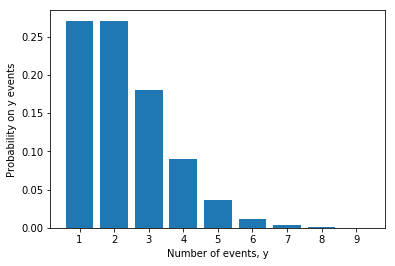

In [14]:
import matplotlib.pyplot as plt

# First, let's choose a value of mu to be plotted
mu = 2.0

# Now, let's add the y-values again here
y = np.array(range(1,10))

# Let's use the function in python for the Poisson distribution:
dpois = poisson.pmf(y, mu)

# Create a bar plot of these probabilities
plt.bar(y, dpois, align="center")
plt.xlabel('Number of events, y')
plt.ylabel('Probability on y events')
plt.xticks(y)
plt.show()